## Surface spatial distribution

In [6]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

In [2]:
datadir = '/scratch/rfischer/Kooi_data/data_output/'

In [11]:
regions = {'EqPac': 'Equatorial Pacific',
           'GPGP': 'Great Pacific Garbage Patch'}

In [3]:
region = 'EqPac'
mortality = 0.5              # [d-1]
runtime = 20                  # [days]
dt = 30                       # [seconds]
outputdt = 12                 # [hours]
mixing = 'no'

In [4]:
ds = xr.open_dataset(datadir+'regional_'+region+'_bfadv_Jan_2004_0'+str(mortality)[2:]+'mort_'+mixing+'mixing_'+str(runtime)+'days_'+str(dt)+'dtsecs_'+str(outputdt)+'hrsoutdt.nc')

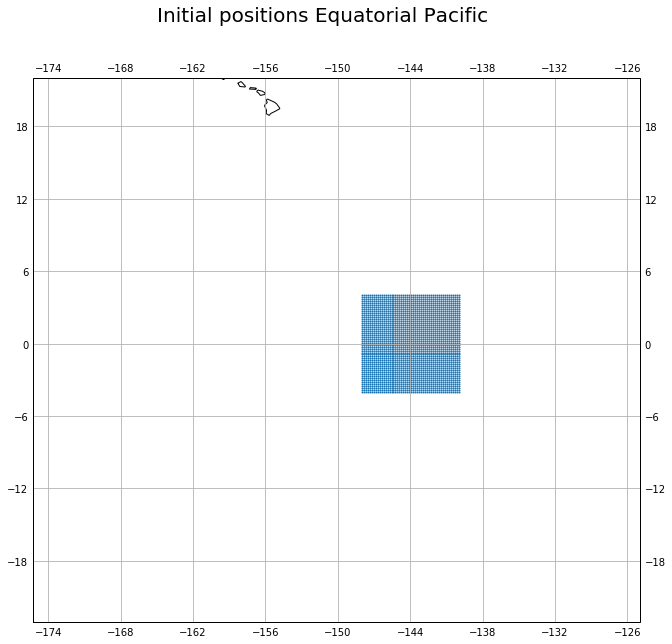

In [27]:
fig = plt.figure(figsize=(15,10))
fig.suptitle('Initial positions '+ regions[region], fontsize=20)

ax = plt.axes(projection=ccrs.PlateCarree())

ax.scatter(ds['lon'][:,0],ds['lat'][:,0],s=1)
ax.coastlines()
ax.gridlines(draw_labels=True)

ax.set_ylim(np.min(ds['lat'])-15,np.max(ds['lat'])+15)
ax.set_xlim(np.min(ds['lon'])-15,np.max(ds['lon'])+15)
plt.show()

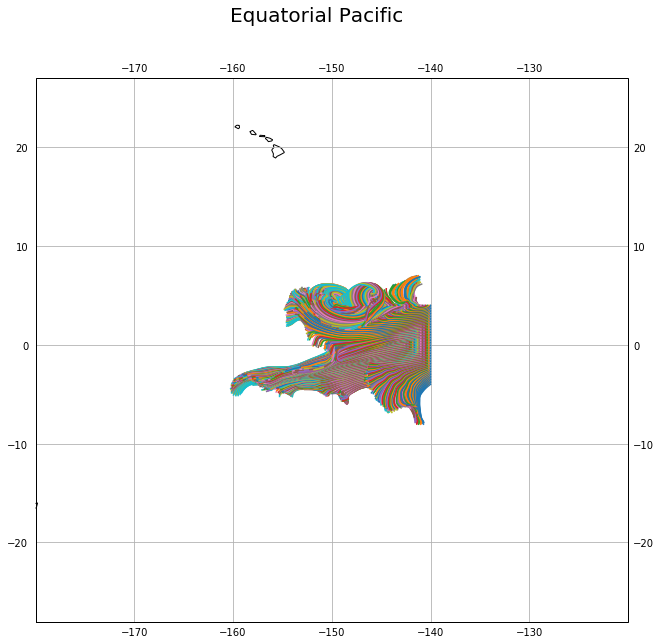

In [16]:
fig = plt.figure(figsize=(15,10))
fig.suptitle(regions[region], fontsize=20)

ax = plt.axes(projection=ccrs.PlateCarree())

ax.plot(ds['lon'].T,ds['lat'].T)
ax.coastlines()
ax.gridlines(draw_labels=True)

ax.set_ylim(np.min(ds['lat'])-20,np.max(ds['lat'])+20)
ax.set_xlim(np.min(ds['lon'])-20,np.max(ds['lon'])+20)
plt.show()